Количество узлов = 159
Количество ребер = 991
Размер максимальной клики =  12


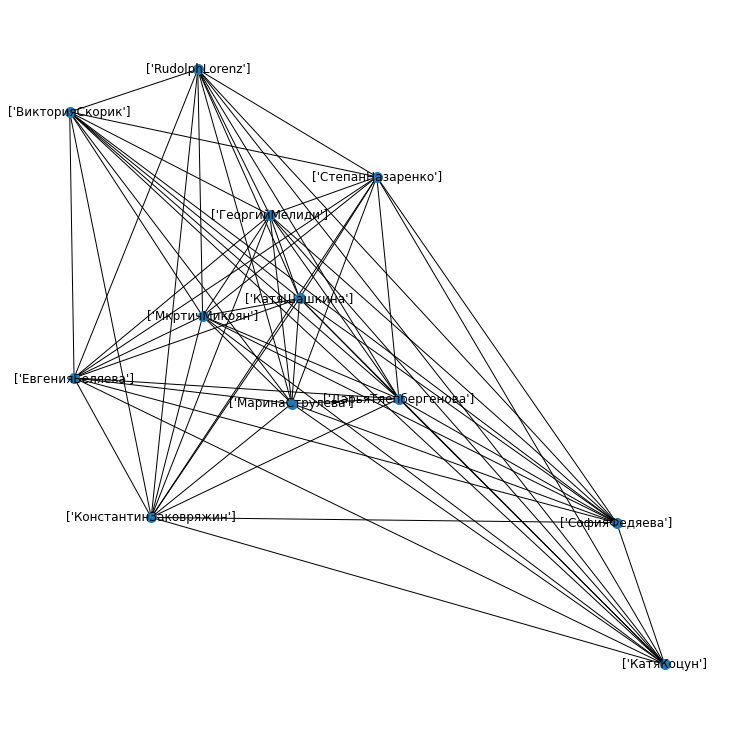

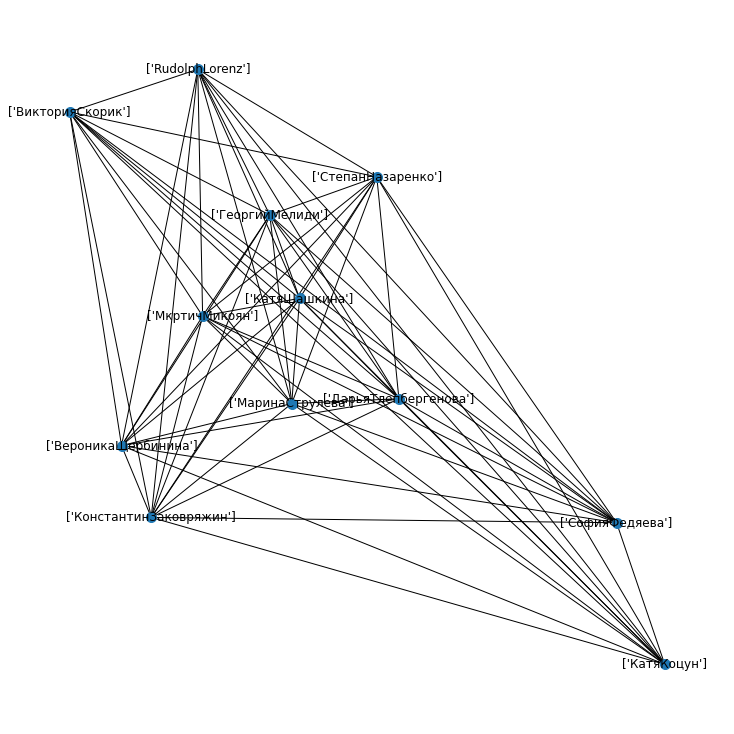

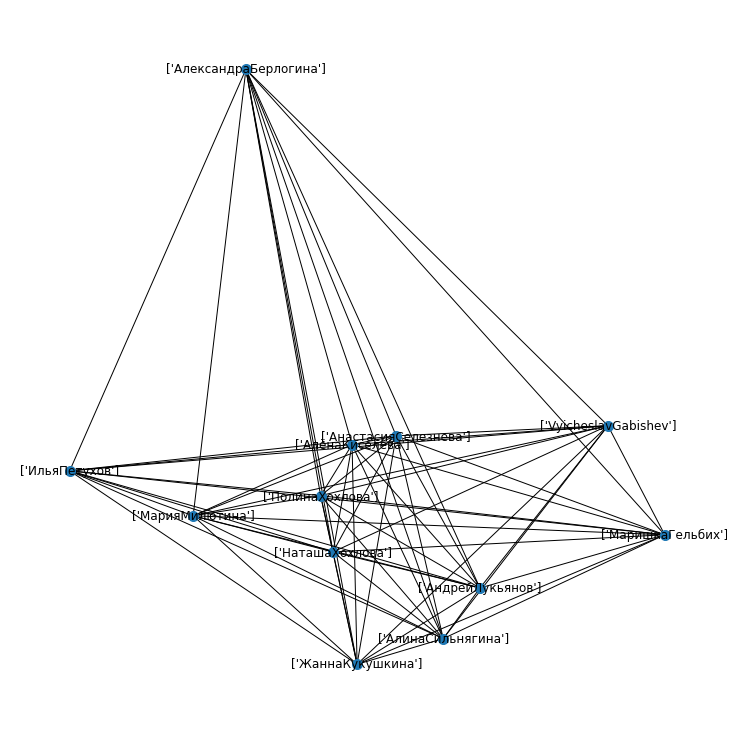

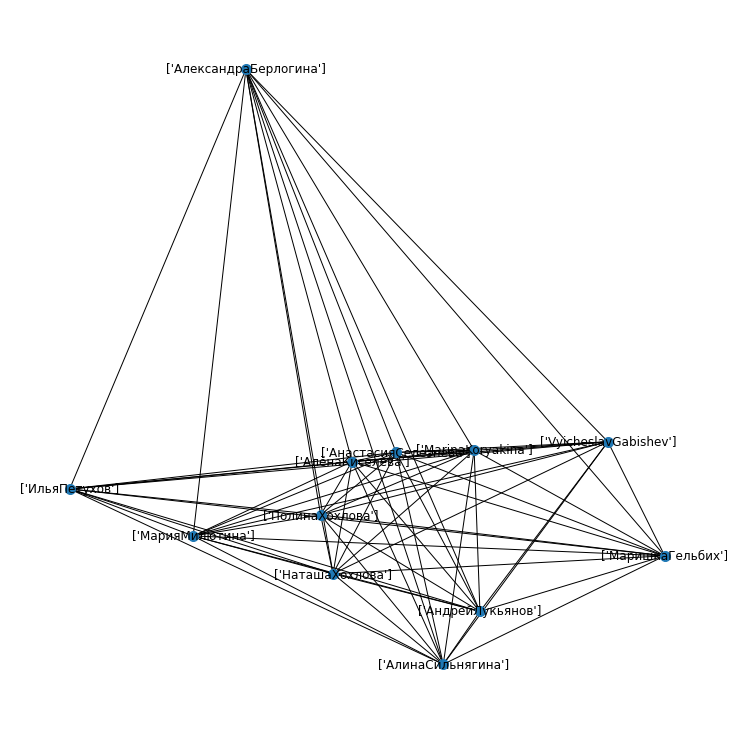

Число клик максимальной длины =  4
R-CORE


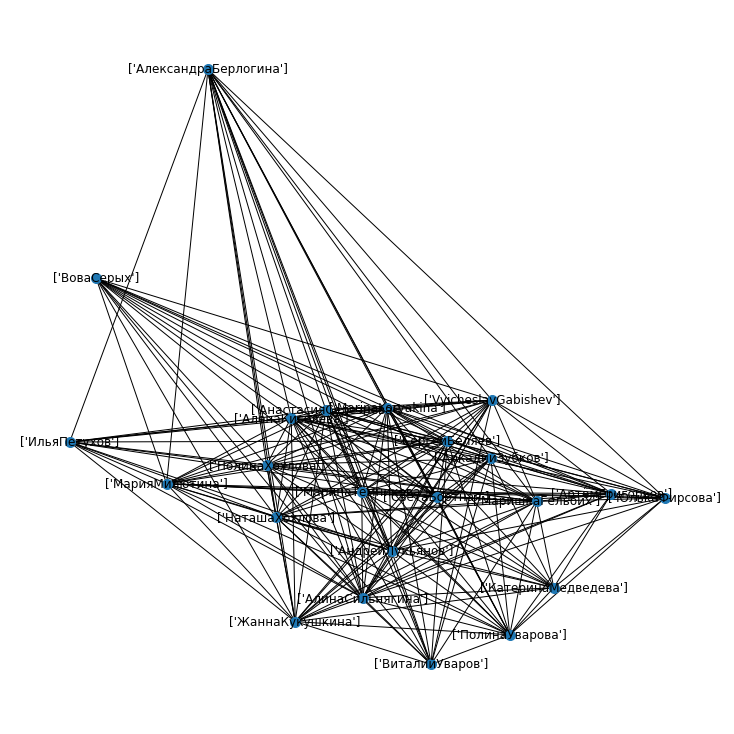

Минимальная степень  =  14


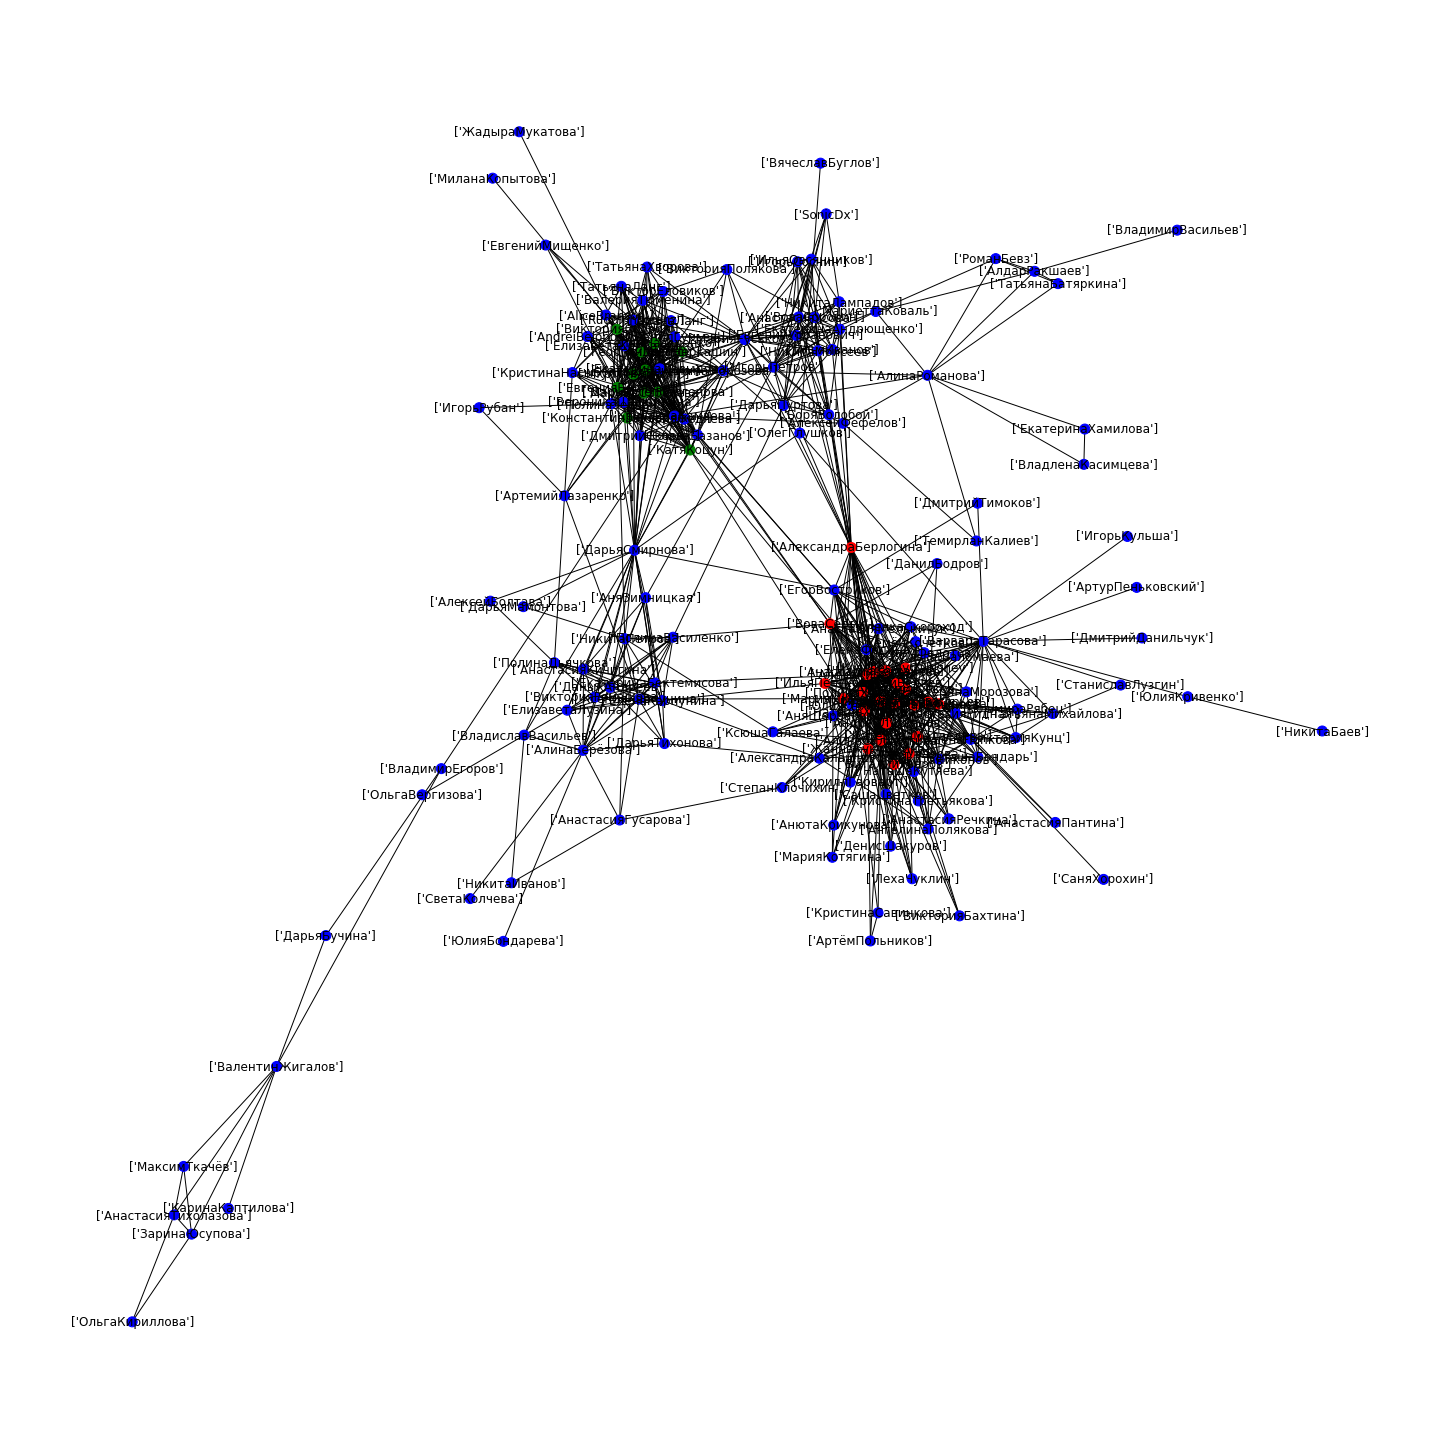

In [ ]:
# Задание 1
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from networkx.algorithms import community
import math

Q = nx.read_edgelist("Граф.txt", nodetype=int, create_using=nx.Graph)
P = max(nx.connected_components(Q), key=len)
G = Q.subgraph(P).copy()
pos = nx.spring_layout(G)
labels1 = {}
labels = {}
with open("labels.txt") as file:
    for line in file:
        key, *value = line.split()
        labels1[int(key)] = value
print("Количество узлов =", G.number_of_nodes())   
print("Количество ребер =", G.number_of_edges())
print("Размер максимальной клики = ",nx.graph_clique_number(G))
max_len_cliq=nx.graph_clique_number(G)
# list_nodes=max(nx.find_cliques(G), key=len) 
cliques = list(nx.find_cliques(G))
number_clique=0
for i in range(len(cliques)):
  if len(cliques[i])==max_len_cliq:
    number_clique+=1
    W = G.subgraph(cliques[i]).copy()
    labels2={}
    for i in W.nodes():
      labels2[i] = labels1[i]
    plt.figure(figsize=(10,10))     
    nx.draw(W, pos=pos, node_size=100)
    nx.draw_networkx_labels(W, pos=pos, labels=labels2)
    plt.show()
print("Число клик максимальной длины = ", number_clique)
print("R-CORE")
Graph = nx.k_core(G) 
labels2={}
for i in Graph.nodes():
  labels2[i] = labels1[i]
plt.figure(figsize=(10,10))     
nx.draw(Graph, pos=pos, node_size=100)
nx.draw_networkx_labels(Graph, pos=pos, labels=labels2)
plt.show() 
Graph_nodes= Graph.nodes() 
degree=list(dict(Graph.degree()).values())
print("Минимальная степень  = ", min(degree))
color = []
for i in nx.nodes(G):
    if i in Graph_nodes:
        color.append('red')
    elif i in cliques[0]:
        color.append('green')
    else: 
        color.append('blue') 
    labels[i] = labels1[i]

Graph = nx.k_core(G)       
Graph_nodes= Graph.nodes()  
plt.figure(figsize=(20,20))     
nx.draw(G,pos=pos, node_color=color, node_size=100)
nx.draw_networkx_labels(G, pos=pos, labels=labels)
plt.show()



Число сообществ =  6
Модулярность =  0.5576882151268582


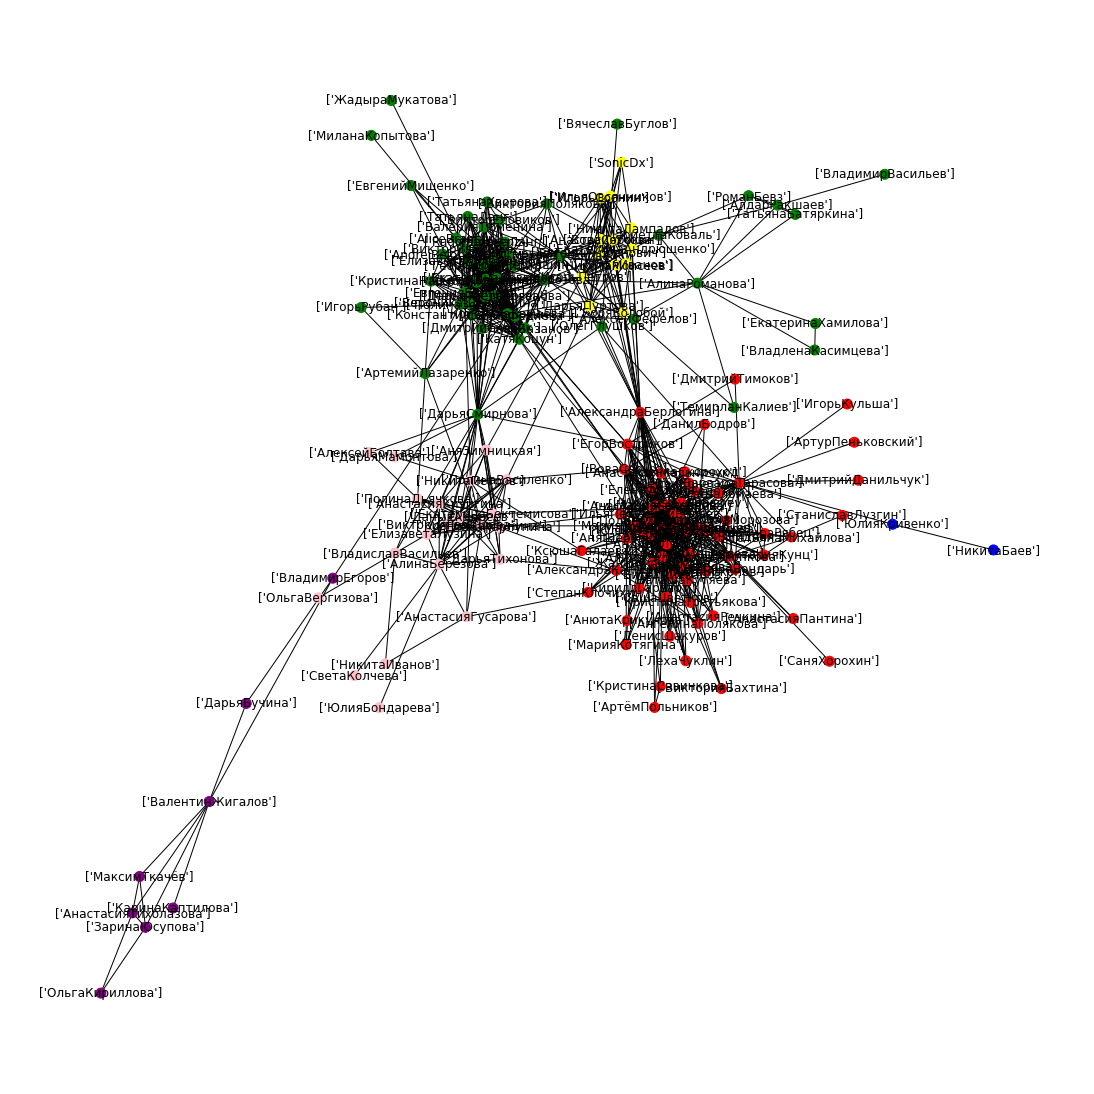

In [ ]:
# Задание 2 (Жадный алгоритм)
import itertools
Q = nx.read_edgelist("Граф.txt", nodetype=int, create_using=nx.Graph)
P = max(nx.connected_components(Q), key=len)
G = Q.subgraph(P).copy()
com = community.greedy_modularity_communities(G)
com = list(com)
print("Число сообществ = ", len(com))
print("Модулярность = ",  community.modularity(G, com))
color = []
for i in nx.nodes(G):
    if i in com[0]:
        color.append('red')
    elif i in com[1]:
        color.append('green')
    elif i in com[2]:
        color.append('pink')
    elif i in com[3]:
        color.append('yellow')
    elif i in com[4]:
        color.append('purple')
    else: 
        color.append('blue')
    
plt.figure(figsize=(15,15))     
nx.draw(G, pos=pos, node_color=color, node_size=100)
nx.draw_networkx_labels(G, pos=pos, labels=labels)
plt.show()

Модулярность =  0.5438522891696306


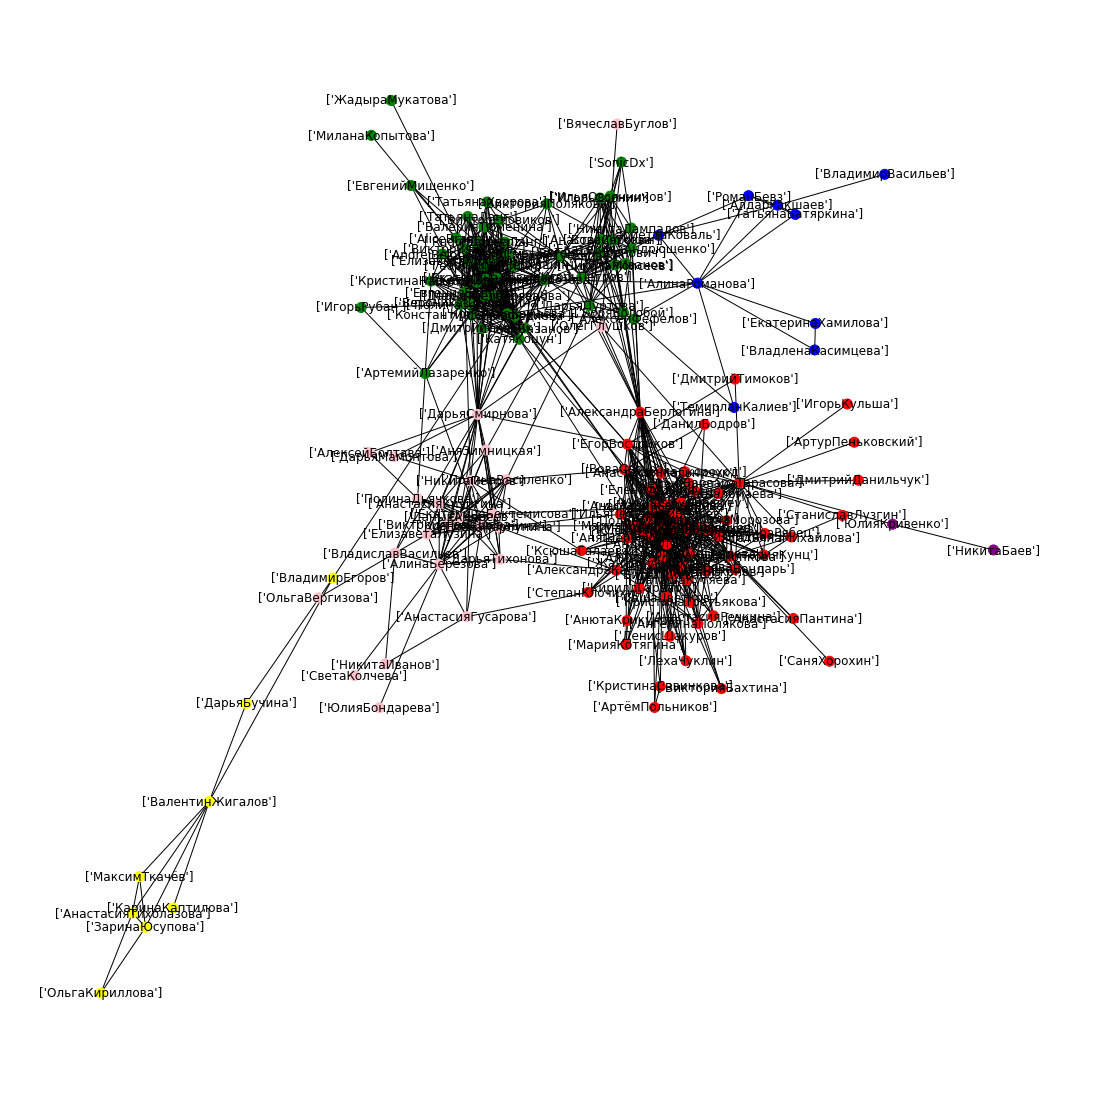

In [ ]:
# Мера центральности на 6 сообществ
import itertools
Q = nx.read_edgelist("Граф.txt", nodetype=int, create_using=nx.Graph)
P = max(nx.connected_components(Q), key=len)
G = Q.subgraph(P).copy()
communit=[]
comp = community.girvan_newman(G)
k = 6
limited = itertools.takewhile(lambda c: len(c) <= k, comp)
for communities in limited:
    communit.append(tuple(sorted(c) for c in communities))
len_communit=len(communit)-1

print("Модулярность = ",  community.modularity(G, communit[len_communit]))
color = []
for i in nx.nodes(G):
    if i in communit[len_communit][0]:
        color.append('red')
    elif i in communit[len_communit][1]:
        color.append('green')
    elif i in communit[len_communit][2]:
        color.append('pink')
    elif i in communit[len_communit][3]:
        color.append('yellow')
    elif i in communit[len_communit][4]:
        color.append('purple')
    else: 
        color.append('blue')
    
plt.figure(figsize=(15,15))     
nx.draw(G, pos=pos, node_color=color, node_size=100)
nx.draw_networkx_labels(G, pos=pos, labels=labels)
plt.show()

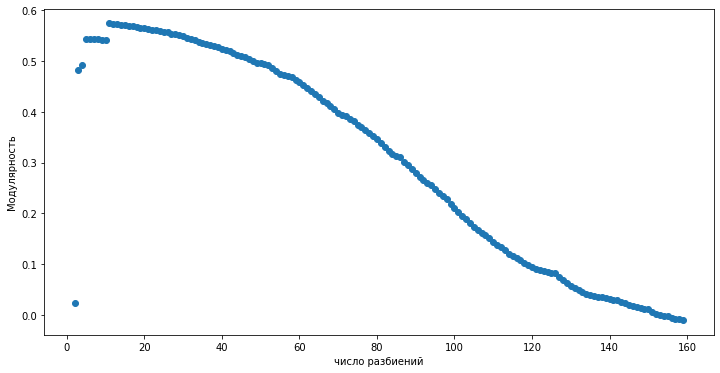

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


Число разбиений для максимальной модулярности =  11
Модулярность =  0.5743207535834619


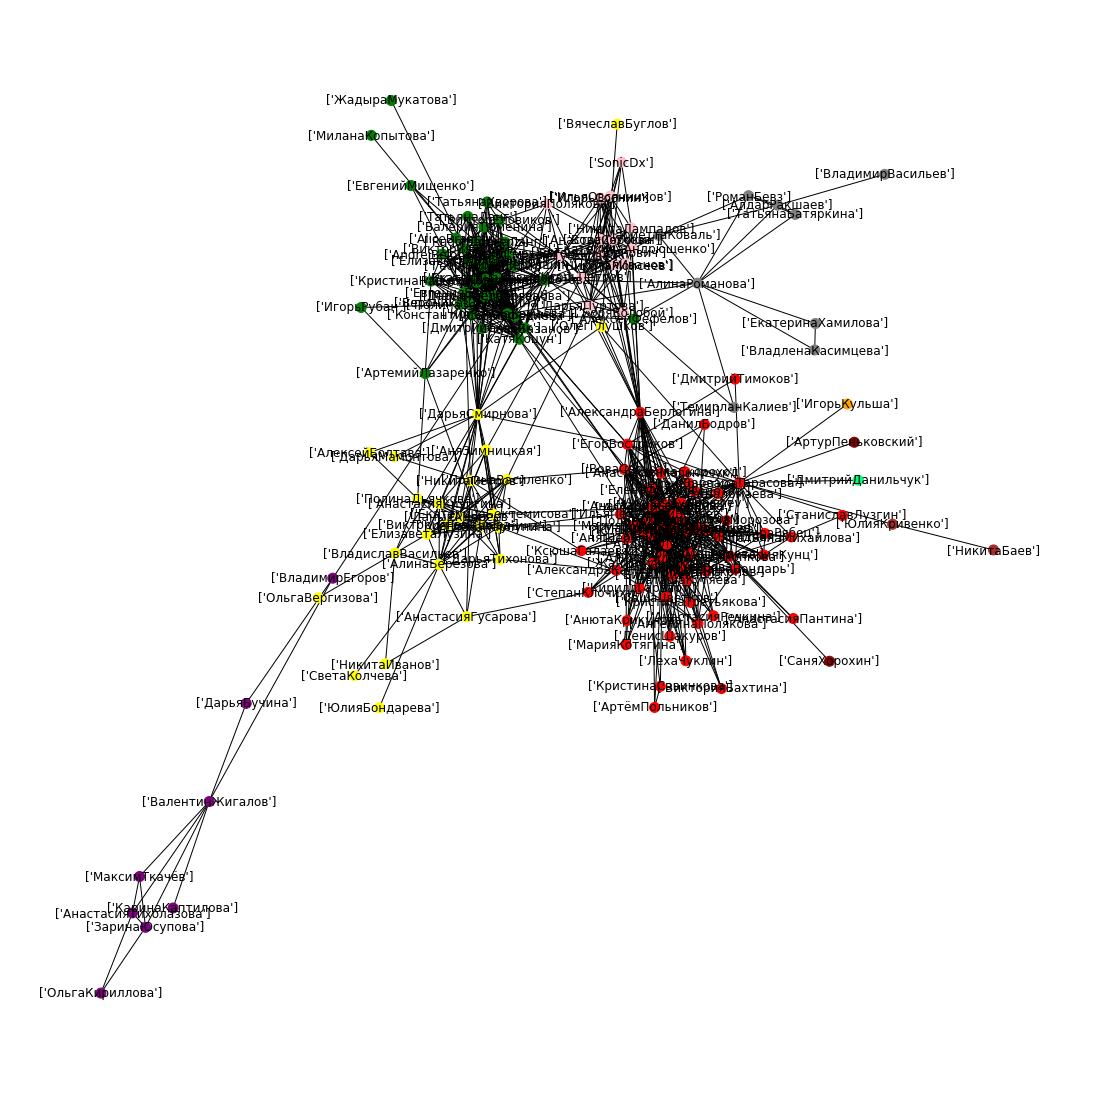

In [ ]:
# задание 2.5
import itertools
Q = nx.read_edgelist("Граф.txt", nodetype=int, create_using=nx.Graph)
P = max(nx.connected_components(Q), key=len)
G = Q.subgraph(P).copy()
k=1000
communit=[]
number_comm=[]
M=[]
comp = community.girvan_newman(G)
for communities in itertools.islice(comp, k):
    communit.append(tuple(sorted(c) for c in communities))
for i in range(len(communit)):
  M.append(community.modularity(G, communit[i]))
  number_comm.append(len(communit[i]))

fig, ax= plt.subplots()  
fig.set_figwidth(12)
fig.set_figheight(6)
ax.scatter(number_comm,M)
ax.set_xlabel("число разбиений")                             
ax.set_ylabel("Модулярность")                         
plt.show()
communit=np.array(communit)
M=np.array(M)
q=np.argmax(M)
s=len(communit[q])
print("Число разбиений для максимальной модулярности = ", s)
print("Модулярность = ", np.max(M))
# M=community.modularity(G, communit)
color = []
for i in nx.nodes(G):
    if i in communit[q][0]:
        color.append('red')
    elif i in communit[q][1]: 
      color.append('green')
    elif i in communit[q][2]: 
      color.append('pink')
    elif i in communit[q][3]: 
      color.append('yellow')
    elif i in communit[q][4]: 
      color.append('purple')
    elif i in communit[q][5]: 
      color.append('orange')
    elif i in communit[q][6]: 
      color.append('brown')
    elif i in communit[q][7]: 
      color.append('maroon')
    elif i in communit[q][8]: 
      color.append('springgreen')
    elif i in communit[q][9]: 
      color.append('gray')
    elif i in communit[q][10]: 
      color.append('darkred')
    else: 
        color.append('blue')
    
plt.figure(figsize=(15,15))     
nx.draw(G,pos=pos, node_color=color, node_size=100)
nx.draw_networkx_labels(G, pos=pos, labels=labels)
plt.show()


